## Project 3
### Task 1
### Data Clustering Based on Human Development Index 

Submitted By: Anish Bhusal (bhusal.anish12@gmail.com)

**Clustering Algorithms used**
1. KMeans
2. DBSCAN
3. Gaussian Mixture Model



Notebook has been organized in following format:

1. Data Cleaning
2. Data Analysis and Visualization
3. Data Pre-processing and feature selection
4. K-Means (Approach Taken and Findings)
5. DBSCAN (Approach Taken and Findings)
6. GMM (Approach Taken and Findings)
7. Conclusion

*Import Necessary Libraries*

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score

%matplotlib inline

In [2]:
sns.set(style="whitegrid")

**Read Datasets**

In [3]:
life_expectancy_income=pd.read_excel("../../data/Project-III/life-expectancy-income.xls")
literacy_rate_gender=pd.read_excel("../../data/Project-III/literacy-rates.xls")
education_level=pd.read_csv("../../data/Project-III/literate-population-aged-5-years-and-above-by-educational-attainment.csv")
federal_population=pd.read_csv("../../data/Project-III/total-population-by-sex-country-province-district-and-local-level-population.csv")
federal_units=pd.read_csv("../../data/Project-III/total-number-of-rural-municipality-and-municipality-and-ward-divisions-in-federal-structure-in-2.csv")

### 1. Data Cleaning 


*Let's see what's inside these datasets*

**Cleaning life expectancy and income dataset**

In [4]:
life_expectancy_income.head()

,District,Life expectancy(In Years),Per Capita Income(In USD)
0,Ramechhap,72.90,951
1,Gorkha,71.70,1039
2,Saptari,71.34,801
3,Siraha,71.29,689
4,Rautahat,70.99,757


In [5]:
life_expectancy_income.shape

(75, 3)

In [6]:
life_expectancy_income.dtypes

District                      object
Life expectancy(In Years)    float64
Per Capita Income(In USD)      int64
dtype: object

Check for NaN

In [7]:
life_expectancy_income.isna().sum()

District                     0
Life expectancy(In Years)    0
Per Capita Income(In USD)    0
dtype: int64

Per Capita Income column contains string formatted data. Lets convert it into numerical form

In [8]:
# import re 
# def clean_per_capita_income(dataset):        
#     return int(''.join(re.findall("[0-9]+",dataset)))
# life_expectancy_income["Per Capita Income(In USD)"]=life_expectancy_income["Per Capita Income(In USD)"].apply(clean_per_capita_income)
        

**Cleaning Literacy Rate by Gender dataset**

In [9]:
literacy_rate_gender.head()

,District,Total,Female,Male,Year
0,Kathmandu,86.3,79.8,92.2,2013
1,Lalitpur,82.5,74.7,90.1,2013
2,Kaski,82.4,75.4,90.1,2013
3,Bhaktapur,81.7,72.7,90.5,2013
4,Ilam,77.9,72.0,84.2,2013


In [10]:
literacy_rate_gender.shape

(75, 5)

In [11]:
literacy_rate_gender.dtypes

District     object
Total       float64
Female      float64
Male        float64
Year          int64
dtype: object

In [12]:
literacy_rate_gender.isna().sum()

District    0
Total       0
Female      0
Male        0
Year        0
dtype: int64

There are no NaN values.

*Year* column has same value i.e. 2013. Dropping the column.

In [13]:
literacy_rate_gender.drop(columns=['Year'],inplace=True)

**Cleaning education level for people older than 5 years dataset**

In [14]:
education_level.head()

,Province,Sex,Total,Population that have completed the educational level of Beginner,Population that have completed the educational level of Primary\n(1-5),Population that have completed the educational level of Lower secondary (6 -8),Population that have completed the educational level of Secondary\n(9 -10),Population that have completed the educational level of S.L.C. & equiv.,Population that have completed the educational level of Inter- mediate & equiv.,Population that have completed the educational level of Graduate\n& equiv.,Population that have completed the educational level of Post Graduate\nequiv. & above,Others,Non- formal education,Level not stated
0,Province 1,Both Sex,2988776,99806,1120561,633306,398192,356169,150936,58514,15921,1296,143515,10560
1,Province 1,Male,1578675,52926,592289,325131,205382,185536,85278,40844,12600,746,72464,5479
2,Province 1,Female,1410101,46880,528272,308175,192810,170633,65658,17670,3321,550,71051,5081
3,Province 2,Both Sex,2428176,72057,1089642,485560,267899,228383,142694,62100,14703,5593,37049,22496
4,Province 2,Male,1476232,40493,613570,297429,178390,152063,97277,47990,12284,2941,20970,12825


In [15]:
print("Shape of dataset => {}".format(education_level.shape))
print(education_level["Province"].unique)

Shape of dataset => (24, 14)
<bound method Series.unique of 0     Province 1
1     Province 1
2     Province 1
3     Province 2
4     Province 2
5     Province 2
6     Province 3
7     Province 3
8     Province 3
9        Gandaki
10       Gandaki
11       Gandaki
12    Province 5
13    Province 5
14    Province 5
15       Karnali
16       Karnali
17       Karnali
18    Province 7
19    Province 7
20    Province 7
21         Nepal
22         Nepal
23         Nepal
Name: Province, dtype: object>


There are altogether 24 columns and data for 7 provinces and data for whole country

In [16]:
education_level.isna().sum()

Province                                                                                  0
Sex                                                                                       0
Total                                                                                     0
Population that have completed the educational level of Beginner                          0
Population that have completed the educational level of Primary\n(1-5)                    0
Population that have completed the educational level of Lower secondary (6 -8)            0
Population that have completed the educational level of Secondary\n(9 -10)                0
Population that have completed the educational level of S.L.C. & equiv.                   0
Population that have completed the educational level of Inter- mediate & equiv.           0
Population that have completed the educational level of Graduate\n& equiv.                0
Population that have completed the educational level of Post Graduate\nequiv.  &

There are no NaN values 

**Cleaning federal population dataset**

In [17]:
federal_population.head()

,Name\n,year,parent_level,geo_level,parent_code,sex,population
0,Nepal,2016,-,country,-,female,13645463
1,Nepal,2016,-,country,-,male,12849041
2,Province No. 1,2016,country,province,NP,female,2368407
3,Province No. 1,2016,country,province,NP,male,2166536
4,Province No. 2,2016,country,province,NP,female,2686207


In [18]:
federal_population.shape

(1718, 7)

In [19]:
federal_population['year'].unique()

array([2016])

The dataset contains the population of whole nation and by federal level for year 2016 only. 

**Cleaning number of federal units dataset**

In [20]:
federal_units.head()

,District,Metropolitan (Numbers),Metropolitan (No of Wards),Sub Metropolitan(Numbers),Sub Metropolitan(No of Wards),Municipality(Numbers),Municipality(No of Wards),Rural Municipality(Numbers),Rural Municipality(No of Wards),Total Units,Total No of Wards
0,Taplejung,0,0.0,0,0,1,11,8,50,9,61
1,Panchthar,0,0.0,0,0,1,14,7,46,8,60
2,Ilam,0,0.0,0,0,4,45,6,36,10,81
3,Jhapa,0,0.0,0,0,8,85,7,46,15,131
4,Morang,1,19.0,0,0,8,79,8,61,17,159


In [21]:
federal_units.dtypes

District                            object
Metropolitan (Numbers)               int64
Metropolitan (No of Wards)         float64
Sub Metropolitan(Numbers)            int64
Sub Metropolitan(No of Wards)        int64
Municipality(Numbers)                int64
Municipality(No of Wards)           object
Rural Municipality(Numbers)          int64
Rural Municipality(No of Wards)     object
Total Units                          int64
Total No of Wards                   object
dtype: object

In [22]:
federal_units.shape

(78, 11)

In [23]:
federal_units['District'].unique()

array(['Taplejung', 'Panchthar', 'Ilam', 'Jhapa', 'Morang', 'Sunsari',
       'Dhankuta', 'Tehathum', 'Sankhuwasabha', 'Bhojpur', 'Solukhumbu',
       'Okhaldhung', 'Khotang', 'Udayapur', 'Saptari', 'Siraha',
       'Dhanusa', 'Mahottari', 'Sarlahi', 'Rautahat', 'Bara', 'Parsa',
       'Sindhuli', 'Ramechap', 'Dolakha', 'Sindhupalchowk',
       'Kavrepalanchowk', 'Lalitpur', 'Bhaktapur', 'Kathmandu', 'Rasuwa',
       'Nuwakot', 'Dhading', 'Makawanpur', 'Chitawan', 'Gorkha',
       'Lamjung', 'Tanahu', 'Syanjha', 'Kaski', 'Manang', 'Mustang',
       'Myagdhi', 'Parbat', 'Baglung', 'Nawalparasi Bardaghat Susta East',
       'Gulmi', 'Palpa', 'Nawalparasi Bardadhghat Susta west',
       'Rupandehi', 'Kapilbastu', 'Arghakhanchi', 'Pyuthan', 'Rolpa',
       'Rukum East', 'Dang', 'Banke', 'Bardiya', 'Salyan', 'Rukum West',
       'Surkhet', 'Dailekh', 'Jajarkot', 'Dolpa', 'Jumla', 'Kalikot',
       'Mugu', 'Humla', 'Bajura', 'Bajhang', 'Achham', 'Doti', 'Kailali',
       'Kanchanpur', 'Dadel

The last row contains total of all fed units.

### 2. Data Analysis and Visualization


Let's find maximum and minimum values for life_expectancy and per_capita income

In [24]:
life_expectancy_income[life_expectancy_income['Life expectancy(In Years)']==max(life_expectancy_income['Life expectancy(In Years)'])]

,District,Life expectancy(In Years),Per Capita Income(In USD)
0,Ramechhap,72.9,951


In [25]:
life_expectancy_income[life_expectancy_income['Life expectancy(In Years)']==min(life_expectancy_income['Life expectancy(In Years)'])]

,District,Life expectancy(In Years),Per Capita Income(In USD)
74,Dolpa,61.2,1040


Ramechhap is the district having highest life expectancy of 72.9 years whereas Dolpa has least life expectancy of 61.2 years

In [26]:
life_expectancy_income[life_expectancy_income['Per Capita Income(In USD)']==max(life_expectancy_income["Per Capita Income(In USD)"])]


,District,Life expectancy(In Years),Per Capita Income(In USD)
68,Manang,65.04,3166


In [27]:
life_expectancy_income[life_expectancy_income['Per Capita Income(In USD)']==min(life_expectancy_income["Per Capita Income(In USD)"])]

,District,Life expectancy(In Years),Per Capita Income(In USD)
66,Bajhang,65.22,487


Manang has highest per capita income of 3166 USD whereas Bajhang has lowest per capita income of 487 USD.

Now let's see how per capita income are distributed in Nepal.

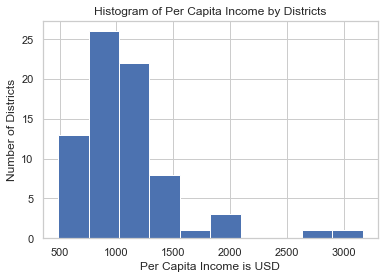

In [28]:
plt.hist(life_expectancy_income["Per Capita Income(In USD)"])
plt.xlabel("Per Capita Income is USD")
plt.ylabel("Number of Districts")
plt.title("Histogram of Per Capita Income by Districts")
plt.grid(True)
plt.show()

From the distribution plot above, it is clear that most districts have Per Capita Income around 1000 USD

Now let's see how life expectancy is distributed.

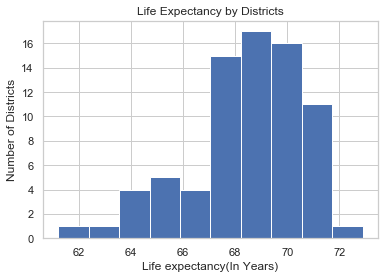

In [29]:
plt.hist(life_expectancy_income["Life expectancy(In Years)"])
plt.xlabel("Life expectancy(In Years)")
plt.ylabel("Number of Districts")
plt.title("Life Expectancy by Districts")
plt.grid(True)
plt.show()

This plot shows that most districts have Life Expectancy of 68-70 years.

In [30]:
provinces={
    "Province 1":["Bhojpur","Dhankuta","Ilam","Jhapa","Khotang","Morang","Okhaldhunga","Panchthar","Sankhuwasabha","Solukhumbu","Sunsari","Taplejung","Terhathum","Udayapur"],
    "Province 2":["Saptari","Birgunj","Sarlahi","Bara","Siraha","Rautahat","Dhanusha","Mahottari"],
    "Province 3":["Sindhuli","Ramechhap","Dolakha","Bhaktapur","Dhading","Kathmandu","Kavrepalanchowk","Lalitpur","Nuwakot","Rasuwa","Sidhupalchok","Chitwan","Makwanpur"],
    "Gandaki":["Baglung","Gorkha","Kaski","Lamjung","Manang","Mustang","Myagdi","Nawalpur","Parbat","Syangja","Tanahun"],
    "Province 5":["Kapilvastu","Parasi","Rupandehi","Arghakhanchi","Gulmi","Palpa","Dang","Pyuthan","Rolpa","Eastern Rukum","Banke","Bardiya"],
    "Karnali":["Western Rukum","Salyan","Dolpa","Humla","Jumla","Kalikot","Mugu","Surkhet","Dailekh","Jajarkot"],
    "Province 7":["Kailali","Achham","Doti","Bajhang","Bajura","Kanchanpur","Dadeldhura","Baitadi","Darchula"]
    }

Now let's analyze literacy rate dataset.

In [31]:
literacy_rate_gender[literacy_rate_gender["Total"]==max(literacy_rate_gender["Total"])]

,District,Total,Female,Male
0,Kathmandu,86.3,79.8,92.2


In [32]:
literacy_rate_gender[literacy_rate_gender["Total"]==min(literacy_rate_gender["Total"])]

,District,Total,Female,Male
74,Rautahat,41.7,32.0,50.9


Kathmandu has highest literacy rate of 86.3% and Rautahat has least literacy rate of only 41.7 %

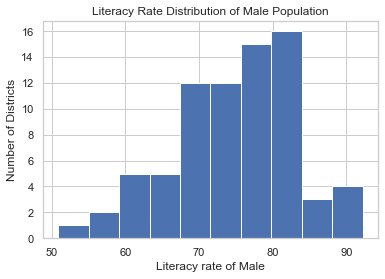

In [33]:
plt.hist(literacy_rate_gender["Male"])
plt.xlabel("Literacy rate of Male")
plt.ylabel("Number of Districts")
plt.title("Literacy Rate Distribution of Male Population")
plt.grid(True)
plt.show()

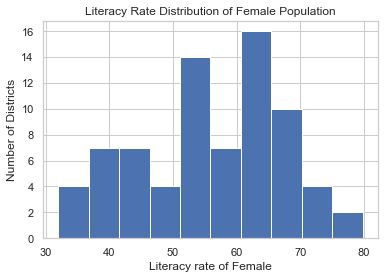

In [34]:
plt.hist(literacy_rate_gender["Female"])
plt.xlabel("Literacy rate of Female")
plt.ylabel("Number of Districts")
plt.title("Literacy Rate Distribution of Female Population")
plt.grid(True)
plt.show()

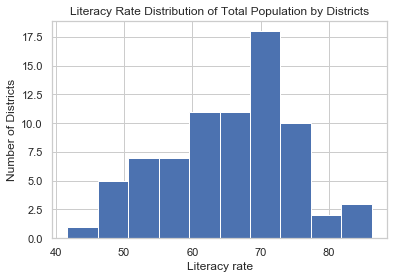

In [35]:
plt.hist(literacy_rate_gender["Total"])
plt.xlabel("Literacy rate")
plt.ylabel("Number of Districts")
plt.title("Literacy Rate Distribution of Total Population by Districts")
plt.grid(True)
plt.show()

The graphs show the distribution of Literacy Rate by Gender among districts

In [36]:
literacy_rate_provinces={}
for province,districts in provinces.items():
    literacy_rate_provinces[province]=[0,0, 0]
    for dist in districts:
        l_rate=literacy_rate_gender[literacy_rate_gender["District"].str.match(dist)]["Total"]
        if l_rate.empty:
            continue
        rate=l_rate.values[0] 
        m_rate=(literacy_rate_gender[literacy_rate_gender["District"].str.match(dist)]["Male"]).values[0]
        f_rate=(literacy_rate_gender[literacy_rate_gender["District"].str.match(dist)]["Female"]).values[0]
        if rate>literacy_rate_provinces[province][0]:
            literacy_rate_provinces[province][0]=rate
        if m_rate>literacy_rate_provinces[province][1]:
            literacy_rate_provinces[province][1]=m_rate
        if m_rate>literacy_rate_provinces[province][2]:
            literacy_rate_provinces[province][2]=f_rate

In [37]:
provinces_df=pd.DataFrame(data=literacy_rate_provinces.keys(),columns=["Provinces"])

In [38]:
rates=literacy_rate_provinces.values()
total_rate=[x[0] for x in rates]
male_rate=[x[1] for x in rates]
female_rate=[x[2] for x in rates]
provinces_df["Total Literacy"]=total_rate
provinces_df["Male Literacy"]=male_rate
provinces_df["Female Literacy"]=female_rate


In [39]:
provinces_df

,Provinces,Total Literacy,Male Literacy,Female Literacy
0,Province 1,77.9,84.2,61.5
1,Province 2,54.5,67.0,36.6
2,Province 3,86.3,92.2,60.6
3,Gandaki,82.4,90.1,69.6
4,Province 5,76.2,84.9,57.9
5,Karnali,73.1,82.0,48.7
6,Province 7,70.7,81.3,52.9


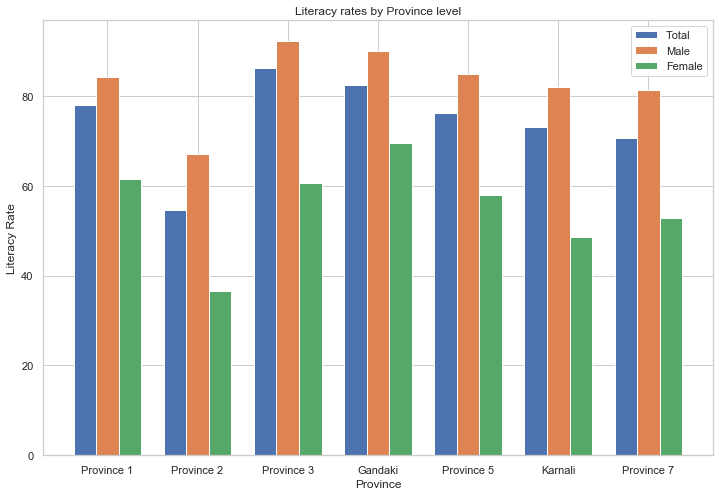

In [40]:
plt.figure(figsize=(12,8))
barWidth = 0.25

r1 = np.arange(len(total_rate))
r2 = [x + barWidth for x in r1]
r3 = [x + barWidth for x in r2]

plt.bar(r1,total_rate,width=barWidth, edgecolor='white', label='Total')
plt.bar(r2,male_rate,width=barWidth, edgecolor='white', label='Male')
plt.bar(r3,female_rate,width=barWidth, edgecolor='white', label='Female')


plt.xlabel('Province')
plt.xticks([r + barWidth for r in range(len(total_rate))], ['Province 1', 'Province 2', 'Province 3', 'Gandaki', 'Province 5','Karnali','Province 7'])
plt.ylabel("Literacy Rate")
plt.title("Literacy rates by Province level")

plt.legend()
plt.show()


This plot shows that Province 3 has highest literacy rate whereas Province 2 has least literacy rate among all 7 provinces.

Also male literacy rate is higher in Province 3 and female literacy rate is higher in Gandaki Province.
Similary both are lowest in Province 2. 

### 3. Data Pre-Processing and Feature Selection


As part of data pre-processing, combine literacy rate dataset and life expectancy dataset 

In [41]:
final_df=pd.concat([life_expectancy_income,literacy_rate_gender[["Total"]]],axis=1)

In [42]:
final_df.head()

,District,Life expectancy(In Years),Per Capita Income(In USD),Total
0,Ramechhap,72.90,951,86.3
1,Gorkha,71.70,1039,82.5
2,Saptari,71.34,801,82.4
3,Siraha,71.29,689,81.7
4,Rautahat,70.99,757,77.9


In [43]:
#rename total to literacy rate
final_df.rename({"Total":"Literacy Rate"},axis='columns',inplace=True)

In [44]:
final_df.columns

Index(['District', 'Life expectancy(In Years)', 'Per Capita Income(In USD)',
       'Literacy Rate'],
      dtype='object')

**Normalize Data**

In [45]:
from sklearn.preprocessing import StandardScaler

In [46]:
scaler=StandardScaler()
X=final_df.drop(columns=['District'])
scaler.fit(X)
final_scaled_data=scaler.transform(X)
final_scaled_data.shape

(75, 3)

### 4. KMeans 

In [47]:
from sklearn.cluster import KMeans

**Choosing number of clusters using Elbow method**

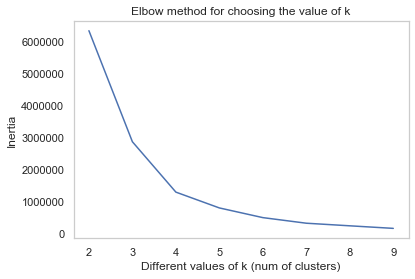

In [48]:
inertia=[]
num_of_clusters=[]
for k in range(2,10):
    kmeans=KMeans(n_clusters=k,random_state=1)
    pred=kmeans.fit(X)
    inertia.append(kmeans.inertia_)
    num_of_clusters.append(k)
    
plt.plot(num_of_clusters,inertia)
plt.grid()
plt.xlabel("Different values of k (num of clusters)")
plt.ylabel("Inertia")
plt.title("Elbow method for choosing the value of k")
plt.show()

From above graph, num of clusters=3 can be choose for further steps

In [49]:
kmeans=KMeans(n_clusters=3,random_state=1)
kmeans.fit(final_scaled_data)


KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=1, tol=0.0001, verbose=0)

In [50]:
kmeans.labels_

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 2, 2, 1, 1, 1, 1, 1, 1], dtype=int32)

In [51]:
kmeans.cluster_centers_

array([[ 0.58328171,  0.04134206,  0.60661615],
       [-1.04385944, -0.51938786, -1.09954953],
       [-0.9816318 ,  3.49363002, -0.90946221]])

**Using PCA for visualizing cluster**

In [52]:
pca = PCA(n_components=3)
principalComponents = pca.fit_transform(final_scaled_data)

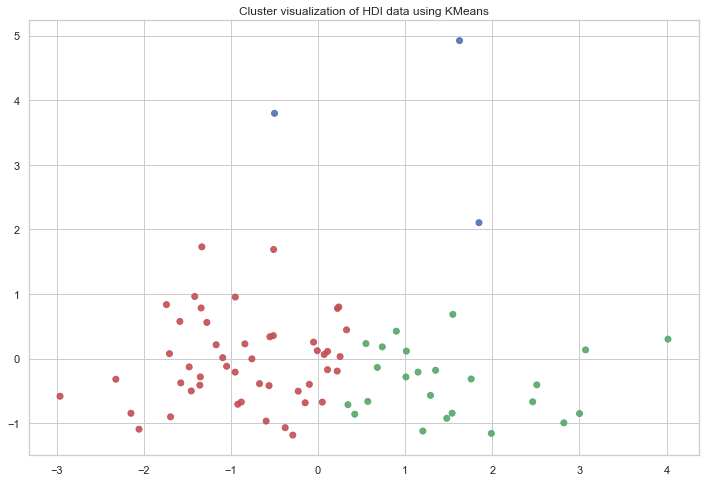

In [53]:
COLOR_MAP = {0 : 'r',
                   1 : 'g',
                   2 : 'b'}

label_color = [COLOR_MAP[l] for l in kmeans.labels_]
plt.figure(figsize=(12,8))
plt.scatter(principalComponents[:,0],principalComponents[:,1],c=label_color, alpha=0.9)
plt.title("Cluster visualization of HDI data using KMeans")
plt.show()

In [54]:
silhouette_score(principalComponents,kmeans.labels_)

0.44058943714353355

For 3 clusters, the silhouette score is 0.44

### 5. DBSCAN

In [55]:
from sklearn.cluster import DBSCAN

Choosing the value of epison and min_samples

In [56]:
from sklearn.neighbors import NearestNeighbors

In [57]:
neigh=NearestNeighbors(n_neighbors=9)
nbrs=neigh.fit(final_scaled_data)
distances,indices=nbrs.kneighbors(final_scaled_data)

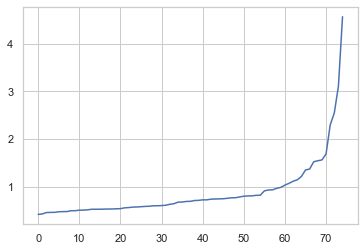

In [58]:
distances=np.sort(distances,axis=0)
distances_=distances[:,8]
plt.plot(distances_)

In [59]:
distances.shape

(75, 9)

Choosing eps=2 from the above graph

In [60]:
dbscan=DBSCAN(eps=2.,min_samples=3,metric='euclidean')
dbscan.fit(final_scaled_data)

DBSCAN(algorithm='auto', eps=2.0, leaf_size=30, metric='euclidean',
       metric_params=None, min_samples=3, n_jobs=None, p=None)

In [61]:
dbscan.labels_

array([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0, -1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
       -1,  0,  0,  0,  0,  0,  0])

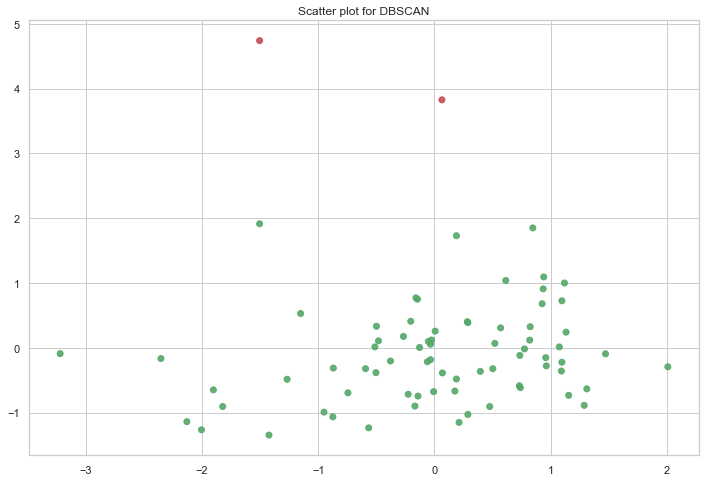

In [62]:
plt.figure(figsize=(12,8))
COLOR_MAP = {-1 : 'r',
                   0 : 'g',
                   1 : 'b'}

label_color = [COLOR_MAP[l] for l in dbscan.labels_]
plt.scatter(final_scaled_data[:, 0], final_scaled_data[:, 1], c=label_color,alpha=0.9);
plt.title("Scatter plot for DBSCAN")
plt.show()

DBSCAN formed only a single cluster.

In [63]:
silhouette_score(final_scaled_data,dbscan.labels_)

0.5887796224060828

For eps=2 and min_samples=8, DBSCAN received 0.588 sihouette score.

## 6. GMM 

In [64]:
from sklearn.mixture import GaussianMixture


KMeans can be used to select select number of components. 

In [65]:
gmm=GaussianMixture(n_components=3)
gmm.fit(final_scaled_data)

GaussianMixture(covariance_type='full', init_params='kmeans', max_iter=100,
                means_init=None, n_components=3, n_init=1, precisions_init=None,
                random_state=None, reg_covar=1e-06, tol=0.001, verbose=0,
                verbose_interval=10, warm_start=False, weights_init=None)

In [66]:
labels=gmm.predict(final_scaled_data)
labels

array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 1, 2, 1, 1, 1, 1, 1, 1,
       1, 0, 0, 1, 1, 1, 1, 1, 1])

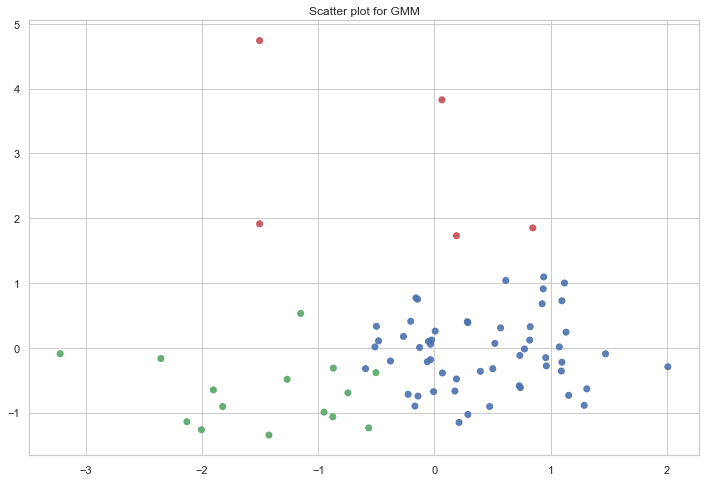

In [67]:
plt.figure(figsize=(12,8))
COLOR_MAP = {0 : 'r',
                   1 : 'g',
                   2 : 'b'}

label_color = [COLOR_MAP[l] for l in labels]
plt.scatter(final_scaled_data[:, 0], final_scaled_data[:, 1], c=label_color,alpha=0.9);
plt.title("Scatter plot for GMM")
plt.show()

NOw calculate Silhouette Score for clusters formed

In [68]:
silhouette_score(final_scaled_data,labels)

0.4366236040875048

## 7. Conclusion

Three models were used for clustering HDI dataset on parameters: Life Expectancy, Per Capita Income and Literacy Rate.
On evaulating the performance of all models, it can be conlcuded that KMeans with number of components=3 performed
well than other model achieveing Silhouette score of 0.44